<a href="https://colab.research.google.com/github/safreitas2000/Anal-pre-mvp-/blob/main/MVP_Sergio_Freitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP | SPRINT Análise de Dados e Boas Práticas

### Aluno: Sérgio Augusto Freitas Filho



##1. Definição do Problema

### 1.1 Qual é a descrição do problema?
Para o escopo desse trabalho será utilizado o dataset Employee do Kaggle https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset, que apresenta informações de empregados de uma empresa não referenciada. Os dados foram anonimizados de forma a proteger a privacidade, ainda assim o dataset possibilita avaliações interessantes sobre a força de trabalho. Entre as informações disponíveis podemos destacar a formação acadêmica, tempo de serviço, faixas salariais, entre outras.
A coluna target no dataset é a coluna "Leave or Not". Essa coluna indica se um funcionário deve sair da empresa (valor "Leave") ou não (valor "Not"), ou seja, é uma variável que indica se um funcionário está propenso a deixar a empresa ou não.


### 1.2 Qual o tipo do problema?
O tipo do problema é de aprendizado supervisionado com classificação binária. A coluna target indica se o funcionário está propenso a deixar a empresa (valor "Leave") ou não (valor "Not").

### 1.3 Que premissas ou hipóteses você tem sobre o problema?
Preparei algumas hipóteses, antes de analisar o dataset. Essas hipótestes serão verificadas ao longo do trabalho.

1. É possível que funcionários com níveis mais altos de educação tenham maior probabilidade de permanecer na empresa, devido ao investimento feito em sua formação acadêmica.

2. Funcionários mais recentes na empresa podem ter maior probabilidade de deixá-la em comparação aos funcionários mais antigos, possivelmente devido a insatisfação, busca por melhores oportunidades ou mudanças no mercado de trabalho.

3. A localização geográfica pode influenciar a decisão dos funcionários em deixar a empresa. É possível que funcionários que trabalham em áreas com maior oferta de emprego ou com melhores condições de vida tenham maior probabilidade de sair.

4. É provável que funcionários em faixas salariais mais baixas tenham maior probabilidade de deixar a empresa, em busca de melhores oportunidades salariais.

5. Funcionários mais jovens podem ter maior probabilidade de sair da empresa devido a busca por crescimento profissional ou mudanças de carreira.

### 1.4 Defina cada um dos atributos do dataset?

Dataset disponível em https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset.

**Education:** As qualificações educacionais dos funcionários.

**Joining Year:** O ano em que cada funcionário se juntou à empresa, indicando seu tempo de serviço.

**City:** O local ou cidade onde cada funcionário está baseado ou trabalha.

**Payment Tier:** Categorização dos funcionários em diferentes faixas salariais.

**Age:** A idade de cada funcionário, fornecendo informações demográficas.

**Gender:** Identidade de gênero dos funcionários, promovendo análise de diversidade.

**Ever Benched:** Indica se um funcionário já ficou temporariamente sem trabalho atribuído.

**Experience in Current Domain:** O número de anos de experiência que os funcionários têm em sua área atual.

**Leave or Not:** Sair da empresa com valor "1" e continua na empresa "0".

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Utilizamos o pacote Pandas (Python Data Analysis Library) para carregar o dataset a ser utilizado no escopo desse trabalho.

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/safreitas2000/Anal-pre-mvp-/main/Employee.csv"

# Informa o cabeçalho das colunas
colunas = ['Education','JoiningYear','City','PaymentTier','Age','Gender','EverBenched','ExperienceInCurrentDomain','LeaveOrNot']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Nessa etapa inicial do trabalho, iremos explorar as dimensões do dataset, analisar suas informações e examinar alguns exemplos de linhas. Essa análise descritiva é uma parte essencial, pois nos permite organizar e descrever os dados de forma clara, utilizando tabelas e gráficos para visualizar as informações.

In [4]:
# O dataset apresenta 9 atributos e 4.653 instâncias.
print(dataset.shape)

(4653, 9)


In [5]:
# Verifica o tipo do dado de cada atributo
dataset.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

Observa-se abaixo a presença de dados categóricos além de campos numéricos.
Os dados parecem de boa qualidade. Para utilizá-los em análises estatísticas ou em modelos de machine learning,
pode ser necessário pré-processamento e uso de técnicas de codificação, como por exemplo, one-hot-encoding. Inicialmente não identifiquei valores faltantes, discrepantes ou inconsistentes.

In [6]:
#Mostra as 10 primeiras linhas do dataset.
dataset.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [7]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4643,Bachelors,2013,Bangalore,3,31,Female,No,5,0
4644,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4645,Masters,2017,Pune,2,31,Female,No,2,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [8]:
# Não foram verificados dados faltantes, discrepantes ou inconsistentes até o momento.
print(dataset.isna().sum())
print(dataset.isnull().any())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
Education                    False
JoiningYear                  False
City                         False
PaymentTier                  False
Age                          False
Gender                       False
EverBenched                  False
ExperienceInCurrentDomain    False
LeaveOrNot                   False
dtype: bool


In [9]:
#Apresenta uma visão com a quantidade de valores distintos para cada atributo.
dataset.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

No resumo estatístico abaixo podemos observar dados de entrada de funcionários de 2012 até 2018, aparentemente a empresa teve um crescimento linear da força de trabalho nesse período. Podemos dizer que trata-se de uma empresa jovem, com média de idade de 29 anos dos seus funcionários, com desvio padrão de ~5 anos. Os empregados do dataset apresentam uma média de 3 anos de experiência no segmento e para completar pode ser observado uma tendência à terceira faixa salarial e dos empregados continuarem na empresa(LeaveOrNot).

In [10]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Agora iremos examinar se o dataset possui um equilíbrio adequado entre as classes, a fim de lidar com o desbalanceamento posteriormente, se necessário. Observaremos que as classes 0 (funcionários que continuam na empresa) e 1 (funcionários que saíram da empresa) estão desequilibradas. É importante registrar essa informação, pois provavelmente será necessário realizar algum tipo de tratamento nas próximas etapas.

In [11]:
# distribuição das classes
print(dataset.groupby('LeaveOrNot').size())

LeaveOrNot
0    3053
1    1600
dtype: int64


### 3.2. Visualizações Unimodais

Vamos aproveitar essa etapa para conhecer um pouco mais dos dados com visualizações mais amplas em formato de histograma e gráfico de densidade aplicados a cada atributo do dataset. </br>
Com essas visualizações começamos a obter alguns insights, por exemplo, percebe-se um desbalanceamento nas faxias salariais e uma quantidade maior de instância de funcionários que continuam na empresa, apesar de um numero significativo de saída do emprego. A estratégia é iniciar por essa análise mais abrangente para na sequencia fazer uma análise mais específica nas dimensões do dataset e responder as hipótestes apresentadas nesse trabalho.

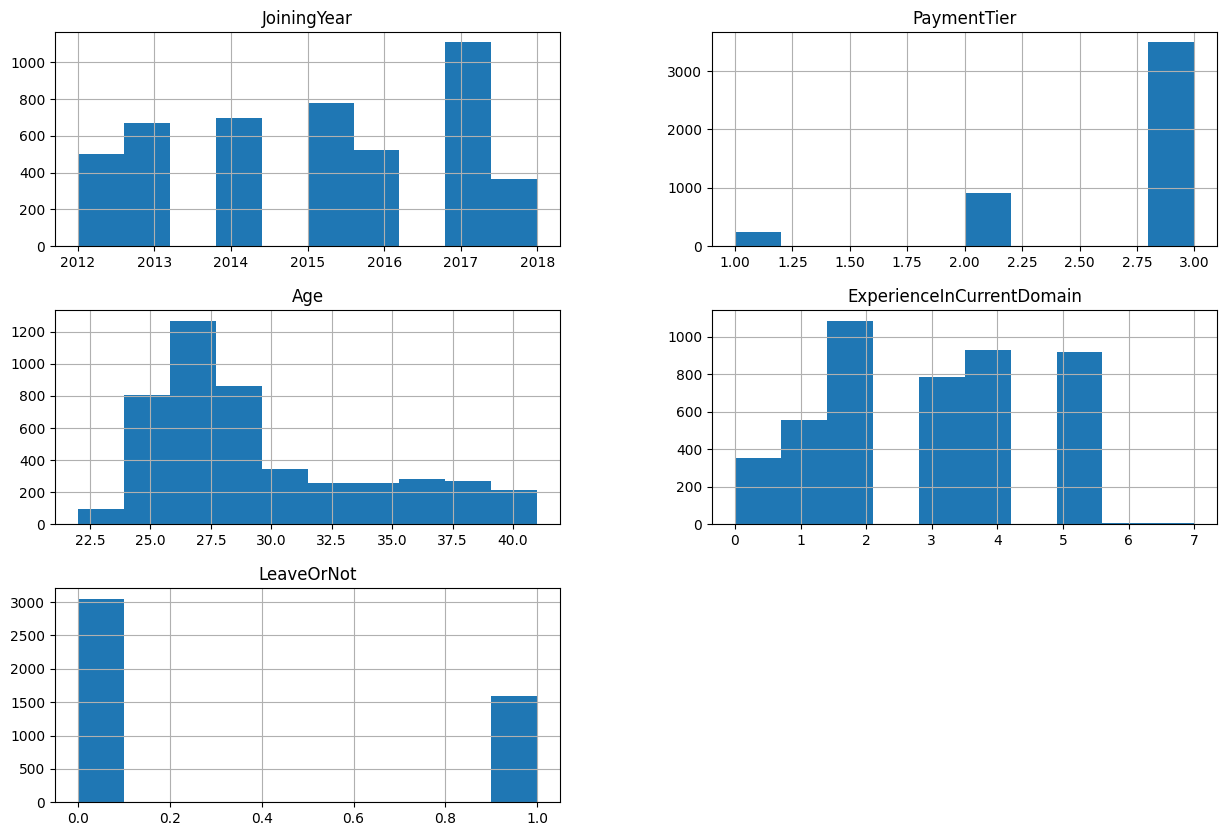

In [12]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

### Gráfico de Densidade
O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Podemos observar que os atributos  "age" e "PaymentTier" têm concentração dos dados em valores específicos.

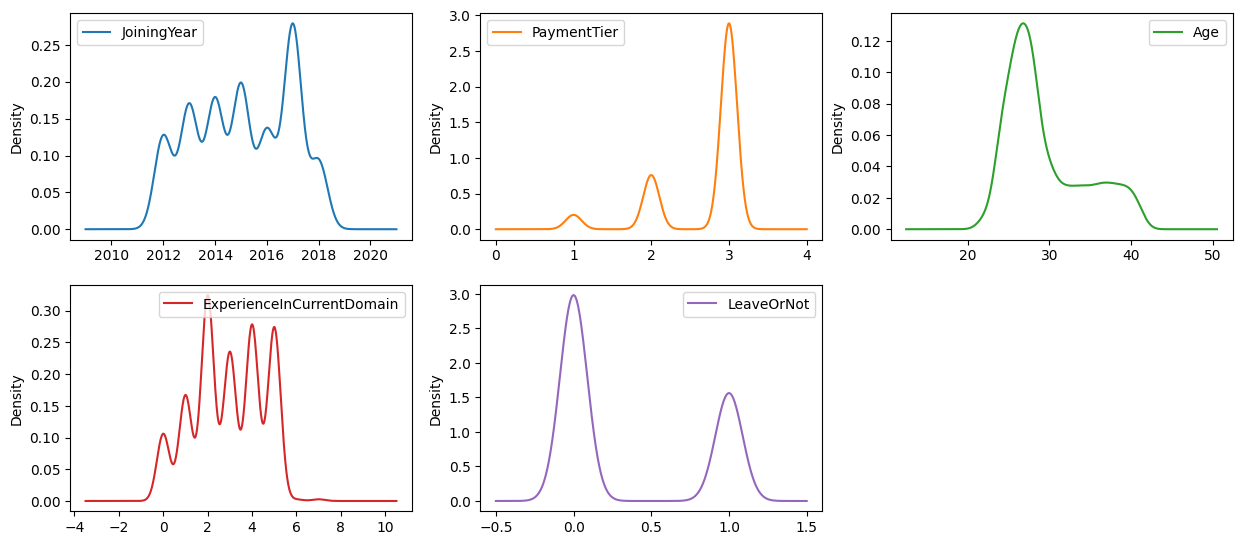

In [13]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

### Boxplot

Nos gráficos bloxplot, podemos observar a dispersão dos atributos e confirmar a concentração na faixa salarial 3, idade na faixa de 29-30 anos e o tempo de experiência de 2 a 4 anos na área.

Ausência de Outlayers evita a necessidade de limpeza dos dados nesse aspecto.

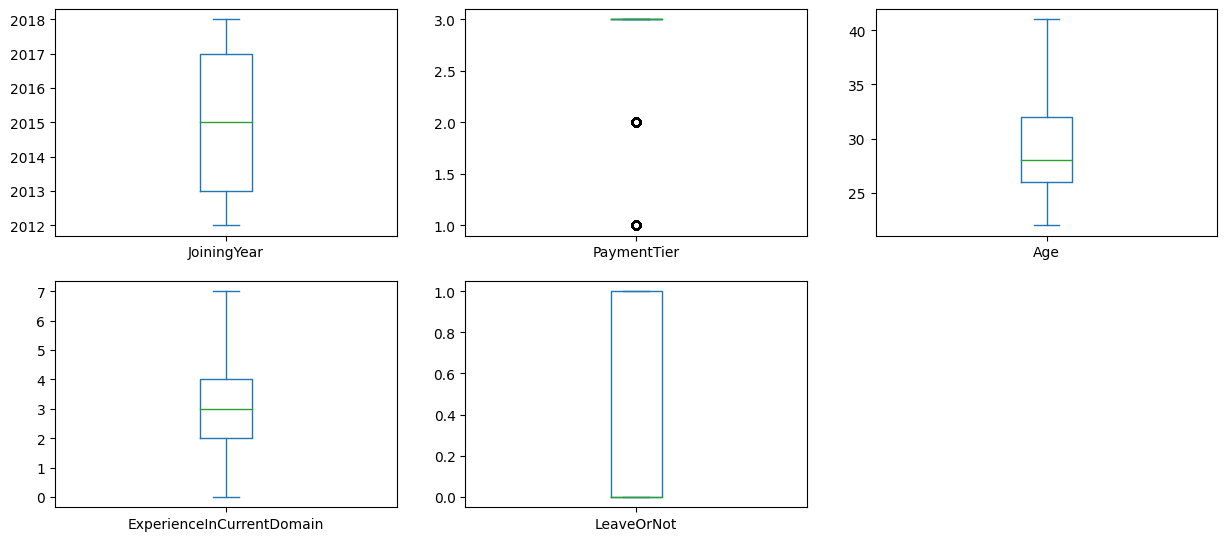

In [14]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Com a análise descritiva dos atibutos realizada acima, podemos iniciar a verificação das hipóteses com a análise de alguns atributos de forma combinada.

Vamos plotar os gráficos para realizar análise das hipóteses levantadas na seção 1.3 deste trabalho.

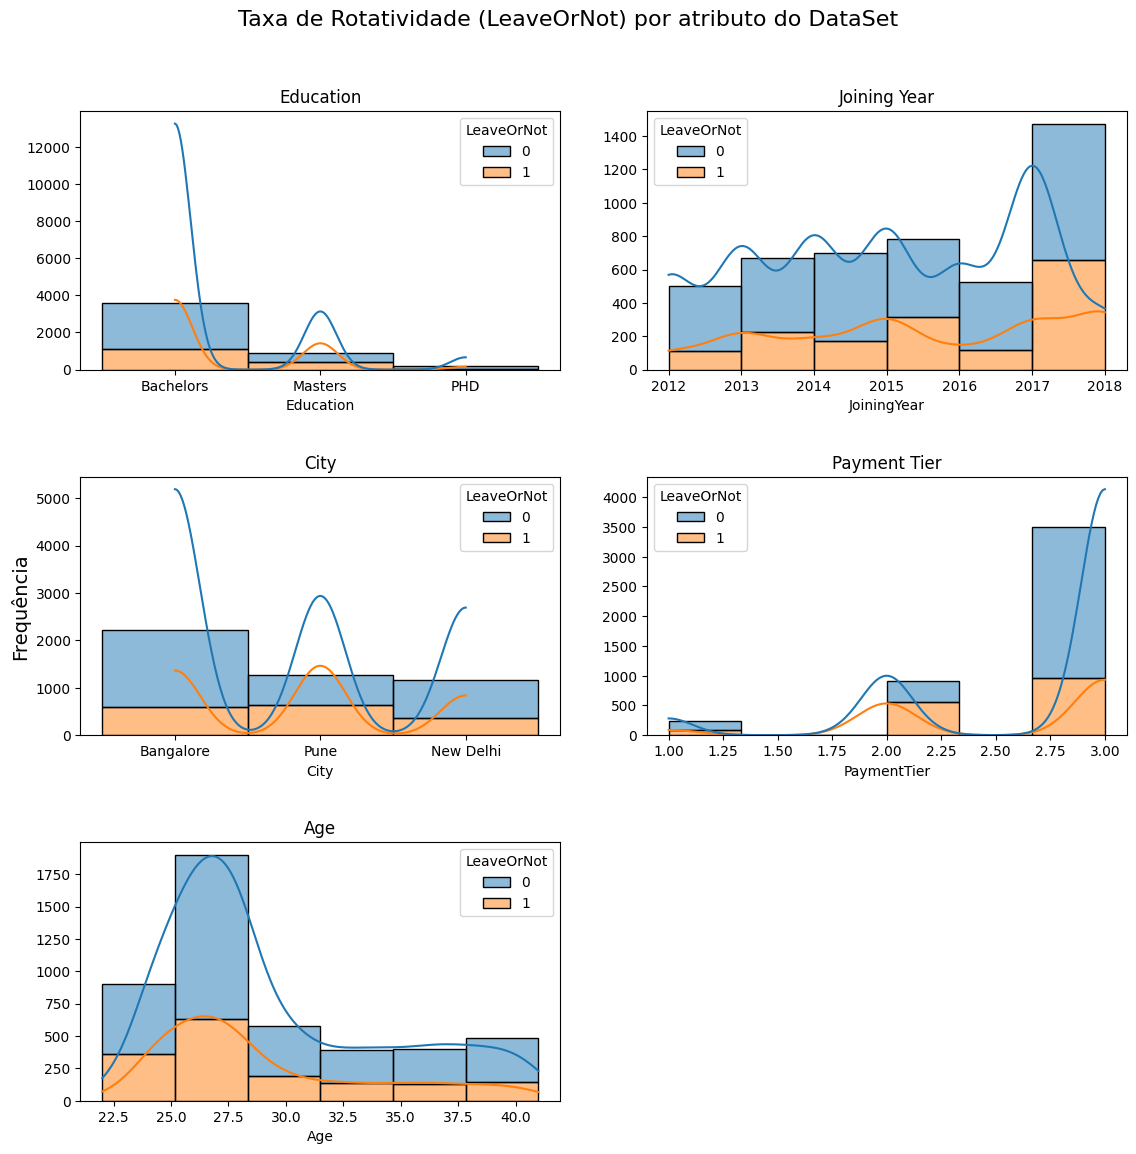

In [15]:
# Configuração do tamanho da figura
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot do atributo "Education"
sns.histplot(data=dataset, x="Education", hue="LeaveOrNot", kde=True, bins=6, multiple="stack", ax=axes[0, 0])
axes[0, 0].set_title("Education")
axes[0, 0].set_ylabel("")

# Plot do atributo "Joining Year"
sns.histplot(data=dataset, x="JoiningYear", hue="LeaveOrNot", kde=True, bins=6, multiple="stack", ax=axes[0, 1])
axes[0, 1].set_title("Joining Year")
axes[0, 1].set_ylabel("")

# Plot do atributo "City"
sns.histplot(data=dataset, x="City", hue="LeaveOrNot", kde=True, bins=6, multiple="stack", ax=axes[1, 0])
axes[1, 0].set_title("City")
axes[1, 0].set_ylabel("Frequência", fontsize=14)

# Plot do atributo "Payment Tier"
sns.histplot(data=dataset, x="PaymentTier", hue="LeaveOrNot", kde=True, bins=6, multiple="stack", ax=axes[1, 1])
axes[1, 1].set_title("Payment Tier")
axes[1, 1].set_ylabel("")

# Plot do atributo "Age"
sns.histplot(data=dataset, x="Age", hue="LeaveOrNot", kde=True, bins=6, multiple="stack", ax=axes[2, 0])
axes[2, 0].set_title("Age")
axes[2, 0].set_ylabel("")

# Remover eixo vazio
axes[2, 1].axis("off")

# Ajustar espaçamento entre os gráficos
plt.tight_layout()

# Título único para os dois gráficos
fig.suptitle("Taxa de Rotatividade (LeaveOrNot) por atributo do DataSet", fontsize=16)

# Ajustar espaçamento entre linhas dos gráficos
fig.tight_layout(pad=3)

# Exibir os gráficos
plt.show()

###Primeira análise das hipóteses levantadas na seção 1.3

1. É possível que funcionários com níveis mais altos de educação tenham maior probabilidade de permanecer na empresa, devido ao investimento feito em sua formação acadêmica.
<br/>RESPOSTA: A resposta é não. Os dados mostram que empregados com mestrado têm maior tendência a sair da empresa, enquanto os empregados com bacharelado e doutorado tendem a abandonar menos o emprego.  



In [16]:
pd.crosstab(dataset.Education,dataset.LeaveOrNot)

LeaveOrNot,0,1
Education,,
Bachelors,2472,1129
Masters,447,426
PHD,134,45


2. Funcionários mais recentes na empresa podem ter maior probabilidade de deixá-la em comparação aos funcionários mais antigos, possivelmente devido a insatisfação, busca por melhores oportunidades ou mudanças no mercado de trabalho.
<br/>RESPOSTA: Sim, no gráfico "JoiningYear" verifica-se uma maior incidência de saída da empresa , em número absoluto e também na proporção.

3. A localização geográfica pode influenciar a decisão dos funcionários em deixar a empresa. É possível que funcionários que trabalham em áreas com maior oferta de emprego ou com melhores condições de vida tenham maior probabilidade de sair.
<br/>RESPOSTA: Na cidade de Pune essa incidencia é maior .

4. É provável que funcionários em faixas salariais mais baixas tenham maior probabilidade de deixar a empresa, em busca de melhores oportunidades salariais.
<br/>RESPOSTA: De fato nessa dimensão de faixa salarial, observa-se a concentração na terceira faixa. O dataset do Kaggle não indica qual os valores das faixas salariais, mas pode-se afirmar que as saídas da empresa estão concentradas em uma faixa salarial específica.

5. Funcionários mais jovens podem ter maior probabilidade de sair da empresa devido a busca por crescimento profissional ou mudanças de carreira.
<br/>RESPOSTA: Apesar de ter uma quantidade maior de empregados mais jovens saindo, proporcionalmente não podemos considerar que é uma questão de idade, por que a força de trabalho é majoritariamente mais jovem.

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, percebemos uma baixa correlação entre eles o que sugere independêcia e baixa interferência. Essa análise é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

 A **matriz de correlação** exibe graficamente a correlação entre os atributos numéricos do dataset. A correlação mais forte para determinar nosso target "LeaveOrNot" pode ser observado de forma positiva no atributo "JoiningYear" e correlação negativa com o atributo de faixas salariais "PaymentTier". Com essa análise levanto a possibilidade desses dois atributos, apesar da baixa correlação, serem os que mais podem influenciar um provável modelo de predição.

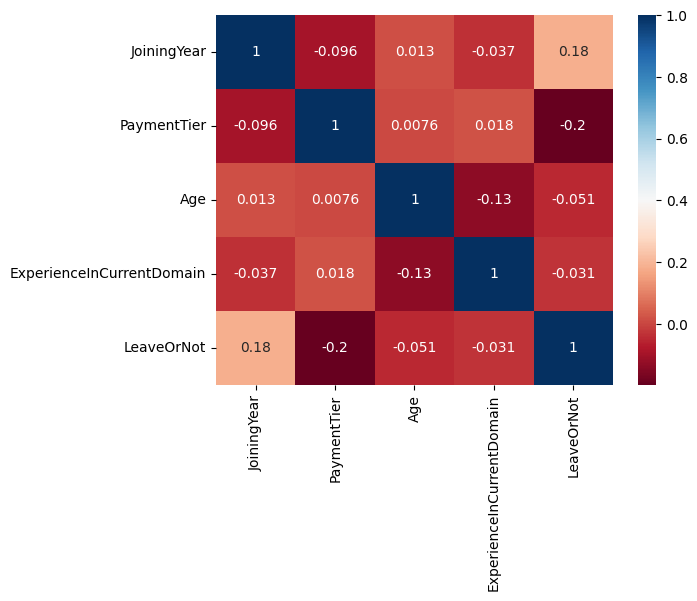

In [17]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos do dataset, usando o Seaborn. Apenas para exemplificar , consideramos em foco as faixas salarias para demonstrar como os demais atributos se comportam nos diferentes grupos de faixas salariais. </BR>
####Podemos tirar alguns insights interessantes com esses gráficos, por exemplo: </br>
1. A diagonal apresenta uma relação de cada atributo com as faixas salariais. Observa-se por exemplo que empregados mais recentes estão em grande maioria na terceira faixa salarial, enquanto os mais antigos estão divididos entre a primeira e segunda faixa. Podemos enriquecer a análise das hipóteses levantadas no inicio do trabalho, observando que empregados mais antigos saem menos da empresa mesmo com salários inferiores. Deve-se observar se há uma acomodação e melhorar os mecanismos de qualificacão, meritocracia para promover a entrega de resultados, reconhecimento, recompensa e motivação dessa categoria.   


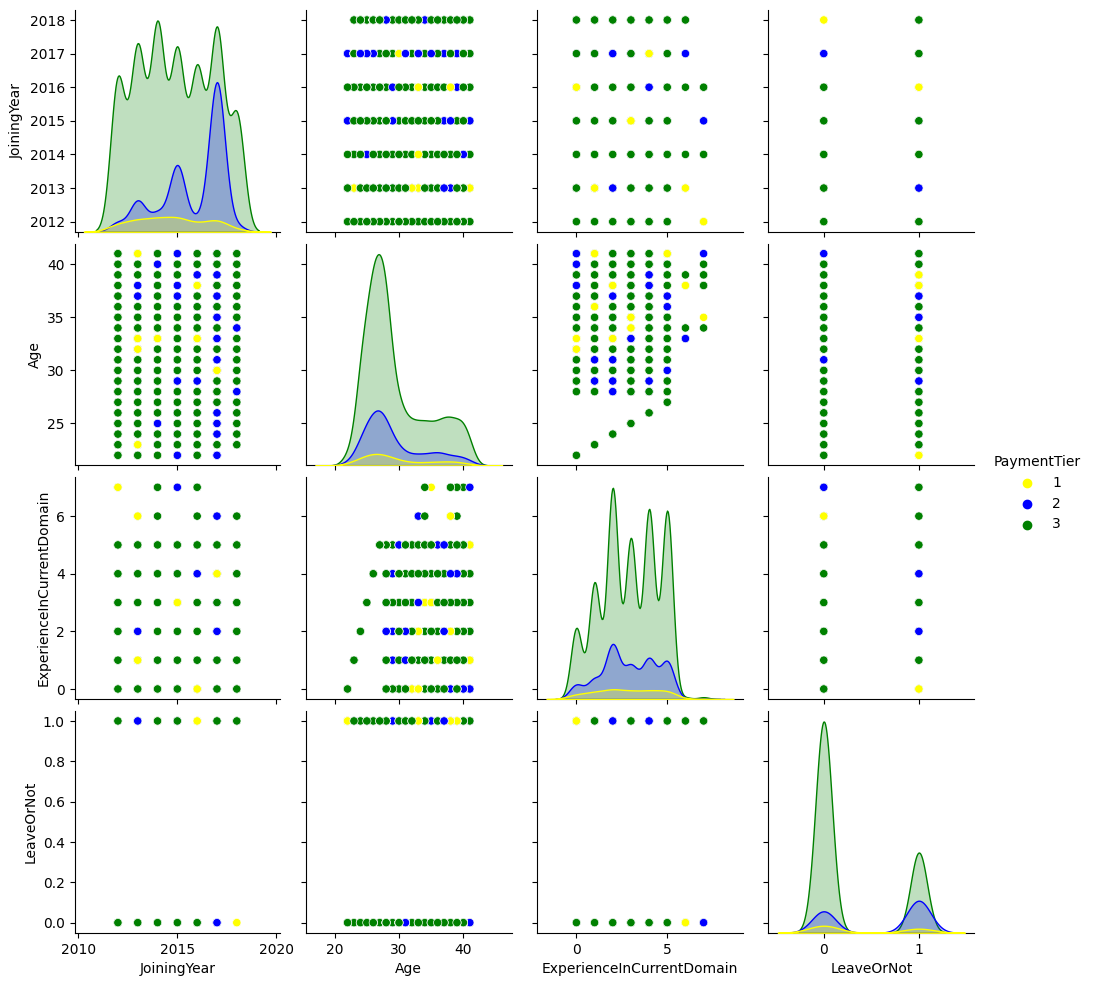

In [18]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "PaymentTier", palette=["yellow", "blue", "green"], height = 2.5);

## 4. Pré-Processamento de dados

Nesta etapa realiza-se operações de preparação dos dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras de acordo com as observações realizadas nas etapas anteriores, tipo de problema de ML que deseja resolver, algorítmos que serão utilizados no projeto. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

O datset utilizado não apresenta missings aparentes, possui alguns valores "0" no campo experiência anterior , mas que considero coerente indicando que o empregado não tem experiência anterior no domínio da empresa.

In [19]:
# verificando nulls no dataset
dataset.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

### 4.1. One-Hot Encoder
O One-Hot Encoder é adequado para esse projeto haja vista o uso de variáveis categóricas nominais, ou seja, variáveis em que não há uma ordem específica entre as categorias. Essa técnica cria novas colunas binárias (com valores 0 ou 1) para cada categoria, indicando a presença ou ausência dessa categoria para cada amostra.
O One-Hot Encoder é adequado para algoritmos de aprendizado de máquina que não podem interpretar valores numéricos diretamente, como árvores de decisão e algoritmos baseados em distância.

Neste exemplo, utilizamos a classe OneHotEncoder do scikit-learn para realizar o One-Hot Encoding nos campos 'Gender', 'EverBenched', 'Education' e 'City'. Os campos a serem codificados são especificados na lista cols_to_encode. Em seguida, aplicamos o One-Hot Encoding com encoder.fit_transform(), e o resultado é armazenado em encoded_cols. Criamos um DataFrame encoded_df com as colunas codificadas e, finalmente, concatenamos esse DataFrame com o DataFrame original dataset para criar dataset_encoded.

In [20]:
# Selecionar os campos desejados para aplicar o One-Hot Encoding
cols_to_encode = ['Gender', 'EverBenched', 'Education', 'City']

# Criar um objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Aplicar o One-Hot Encoding nos campos selecionados
encoded_cols = encoder.fit_transform(dataset[cols_to_encode])

# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cols_to_encode))

# Concatenar o DataFrame original com o DataFrame codificado
dataset_encoded = pd.concat([dataset.drop(cols_to_encode, axis=1), encoded_df], axis=1)

# Reordenar as colunas
new_columns = list(dataset_encoded.columns)
new_columns.remove("LeaveOrNot")
new_columns.append("LeaveOrNot")
dataset_encoded = dataset_encoded.reindex(columns=new_columns)

dataset_encoded.head(10)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,LeaveOrNot
0,2017,3,34,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,2013,1,28,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,2014,3,38,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,2016,3,27,5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,2017,3,24,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
5,2016,3,22,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
6,2015,3,38,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
7,2016,3,34,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
8,2016,3,23,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
9,2017,2,37,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [21]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset_encoded.values
X = array[:,0:14]
y = array[:,14]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

### 4.2. Balanceamento com a técnica SMOTE (Synthetic Minority Over-sampling Technique)

O SMOTE é uma técnica comumente utilizada para lidar com problemas de desbalanceamento de classes em conjuntos de dados. O objetivo do SMOTE é aumentar a quantidade de amostras da classe minoritária por meio da criação de novas amostras sintéticas. Isso é feito ao criar amostras artificiais com base nos exemplos existentes da classe minoritária.

No código fornecido, a técnica SMOTE está sendo aplicada ao conjunto de treinamento (x_train e y_train) para criar um conjunto de treinamento balanceado (x_train_smote e y_train_smote).

A opção sampling_strategy="minority" indica que a classe minoritária será amostrada para alcançar uma proporção balanceada com a classe majoritária. O parâmetro random_state=42 é usado para garantir a reprodutibilidade dos resultados.

Ao aplicar o SMOTE, novas amostras sintéticas são geradas para a classe minoritária, a fim de aumentar sua representação. Isso pode ajudar a melhorar o desempenho de algoritmos de aprendizado de máquina, especialmente quando há um desequilíbrio significativo entre as classes.

É importante observar que o balanceamento de classes com o SMOTE deve ser aplicado apenas ao conjunto de treinamento, mantendo o conjunto de teste inalterado. Isso evita qualquer vazamento de informações do conjunto de teste para o treinamento do modelo.

Após balancear o conjunto de treinamento usando o SMOTE, você pode usar esses dados balanceados para treinar seu modelo de aprendizado de máquina.

In [22]:
# Balanceamento com a técnica SMOTE
sm= SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)

# Criar DataFrame com os conjuntos de treino balanceados
df_train_smote = pd.DataFrame(x_train_smote)
df_train_smote['LeaveOrNot'] = y_train_smote

# Nova distribuição das classes
class_distribution = df_train_smote.groupby('LeaveOrNot').size()
print(class_distribution)

LeaveOrNot
0.0    2442
1.0    2442
dtype: int64


### 4.3. Normalização nos dados

Em função da existência de atributos onde a distribuição não é normal, como a idade e faixas salariais, optamos por ilustrar a aplicação da normalização. Procuramos evitar o vazamento de dados do conjunto de treinamento para o conjunto de teste. Para aplicar a normalização nos dados após dividir o conjunto em treino e teste, ajustei o normalizador apenas com base nos dados de treinamento e, em seguida, foi aplicado separadamente aos conjuntos de treinamento e teste.  Utilizamos nesse exemplo o MinMaxScaler da biblioteca scikit-learn.

Criamos o normalizador scaler usando o MinMaxScaler(). Ajustamos o normalizador apenas aos dados de treinamento usando scaler.fit(X_train). Por fim, aplicamos a normalização separadamente aos conjuntos de treinamento e teste usando scaler.transform(X_train) e scaler.transform(X_test).


In [23]:
# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# Ajustar o normalizador usando apenas os dados de treinamento
scaler.fit(x_train_smote)

# Aplicar a normalização aos dados de treinamento e teste
X_train_normalized = scaler.transform(x_train_smote)
X_test_normalized = scaler.transform(X_test)

# Criar DataFrame com os conjuntos de treino balanceados
df_scaled = pd.DataFrame(X_train_normalized)

df_scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.666667,1.0,0.368421,0.428571,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,1.0,0.263158,0.714286,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,1.0,0.315789,0.428571,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.833333,1.0,0.421053,0.285714,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.000000,1.0,0.157895,0.428571,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0.666667,1.0,0.736842,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,1.000000,1.0,0.315789,0.285714,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.166667,1.0,0.210526,0.571429,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.166667,1.0,0.473684,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.833333,1.0,0.157895,0.428571,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## 5. Conclusão

Neste trabalho, exploramos o dataset Employee do Kaggle, que fornece informações sobre os empregados de uma empresa não referenciada. Utilizamos técnicas de análise exploratória de dados para entender melhor as características dos funcionários e identificar possíveis insights relacionados à taxa de rotatividade dos empregados.

Inicialmente, identificamos que o problema se enquadra no tipo de aprendizado supervisionado com classificação binária. A coluna alvo, "Leave or Not", indica se um funcionário está propenso a deixar a empresa ou não. Com base nisso, estabelecemos algumas premissas e hipóteses sobre o problema, como a influência da educação, tempo de serviço, localização geográfica, faixa salarial e idade na decisão dos funcionários em deixar a empresa.

Em relação à análise exploratória realizada, podemos tirar algumas conclusões importantes. Primeiramente, observamos que a empresa apresenta um crescimento linear da força de trabalho ao longo dos anos de 2012 a 2018. Isso indica que a empresa está em constante expansão. Além disso, podemos caracterizar a empresa como jovem, com uma média de idade dos funcionários de 29 anos e um desvio padrão de aproximadamente 5 anos. Os funcionários do dataset têm, em média, 3 anos de experiência no segmento. Além disso, foi observada uma tendência para a terceira faixa salarial, indicando uma concentração de funcionários nessa faixa salarial específica. Notavelmente, observamos que a maioria dos funcionários continua na empresa (LeaveOrNot), apesar de haver um número não desprezível de desligamentos que requerem uma análise mais detalhada.

Ao analisar as hipóteses levantadas, verificamos que funcionários com níveis altos de educação, como mestrado, têm alta probabilidade de sair da empresa, o que indica a necessidade de uma investigação de causa raiz. Além disso, constatamos que funcionários mais recentes na empresa têm uma maior probabilidade de deixá-la em comparação aos funcionários mais antigos, o que pode ser atribuído a insatisfação, busca por melhores oportunidades ou mudanças no mercado de trabalho. Também identificamos que a localização geográfica, especialmente na cidade de Pune, pode influenciar a decisão dos funcionários em deixar a empresa. Quanto à faixa salarial, observamos que funcionários em faixas salariais mais baixas têm maior probabilidade de deixar a empresa em busca de melhores oportunidades salariais. No entanto, a idade dos funcionários não parece ser um fator determinante para a rotatividade.

Realizamos uma análise descritiva do dataset, observando estatísticas e visualizações gráficas para entender a distribuição dos atributos. Identificamos que a distribuição das classes está desequilibrada, com uma predominância de funcionários que continuam na empresa em relação aos que saíram. Isso pode requerer um tratamento especial para lidar com o desbalanceamento de classes em etapas posteriores.

Aplicamos técnicas de pré-processamento de dados, como o One-Hot Encoder para codificar variáveis categóricas, e a separação do conjunto de dados em treino e teste. Utilizamos a técnica SMOTE para balancear o conjunto de treinamento, gerando amostras sintéticas da classe minoritária. Essa abordagem pode ajudar a melhorar o desempenho dos modelos de classificação ao lidar com o desbalanceamento das classes.

Também aplicamos a normalização nos dados para garantir que todas as variáveis estejam na mesma escala. Utilizamos o MinMaxScaler para normalizar os atributos, ajustando e aplicando o normalizador apenas nos dados de treinamento, evitando vazamento de informações do conjunto de teste.

Em conclusão, este trabalho forneceu uma análise inicial do dataset Employee, explorando características dos empregados e investigando a relação entre essas características e a rotatividade. As etapas de pré-processamento, balanceamento de classes e normalização prepararam os dados para futuras análises e modelagem, trata-se de hipoteses que devem ser testadas assim como outras possíveis alternativas de pre-processamento.   No entanto, é importante destacar que mais análises e experimentações são necessárias para compreender plenamente os padrões e relacionamentos presentes nos dados e desenvolver um modelo preditivo robusto para a rotatividade dos funcionários.